In [1]:
import nn_functions
import pandas as pd

Using TensorFlow backend.


In [2]:
x_train, x_test, y_train, y_test, predictors = nn_functions.get_data('../../python_modeling/arjuna/plutoPCA_fulltot.csv','assesstot')

In [3]:
input_nodes = len(predictors)
epochs = 30
hidden_nodes = [int((input_nodes+1)*(2/3)), int(len(x_train)/(30*2)), int(len(x_train)/(30*4)), int(len(x_train)/(30*6)), int(len(x_train)/(30*8))]
optimizers = ['rmsprop', 'adam','adagrad','adadelta']
h = []
o = []
df_models = pd.DataFrame()
for i in hidden_nodes:
    for j in optimizers:
        h.append(i)
        o.append(j)
        
df_models['hidden_nodes'] = h
df_models['optimizer']  = o
df_models

,hidden_nodes,optimizer
0,114,rmsprop
1,114,adam
2,114,adagrad
3,114,adadelta
4,10357,rmsprop
5,10357,adam
6,10357,adagrad
7,10357,adadelta
8,5178,rmsprop
9,5178,adam


W0801 14:29:36.130184 4596274624 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: 0 hidden_nodes: 114 optimizer: rmsprop


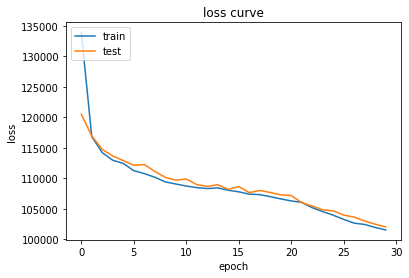

ERROR Training
mse 30241220288.582
RMSE 173900.03
R2 0.733
error 5254.763003590704
ERROR Test
mse 31695297923.04
RMSE 178031.733
R2 0.734
error 5840.2272868512455
Histogram Training


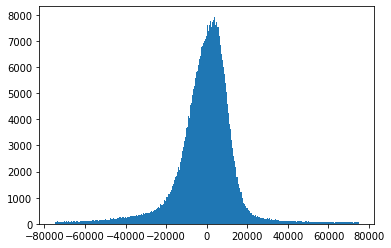

Histogram Test


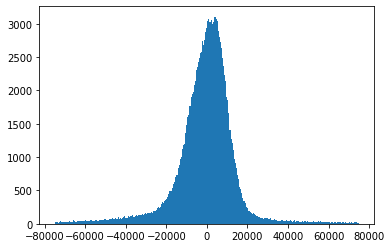

Histogram Training


/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


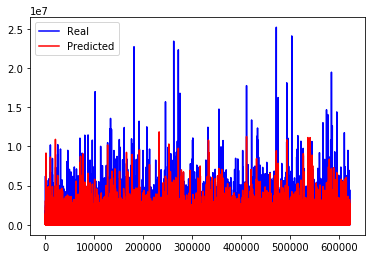

Histogram Test


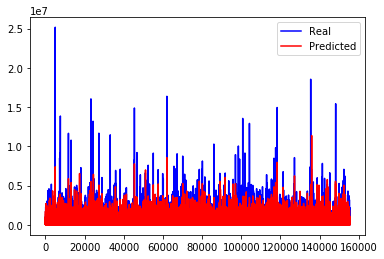

Model: 1 hidden_nodes: 114 optimizer: adam


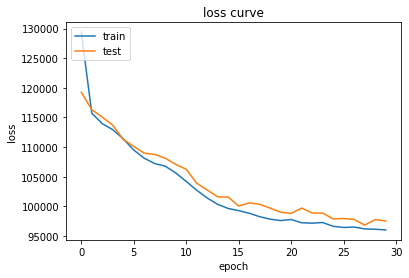

ERROR Training
mse 25525662028.291
RMSE 159767.525
R2 0.774
error 3552.591005319799
ERROR Test
mse 29431732173.628
RMSE 171556.79
R2 0.753
error 4042.9614568279803
Histogram Training


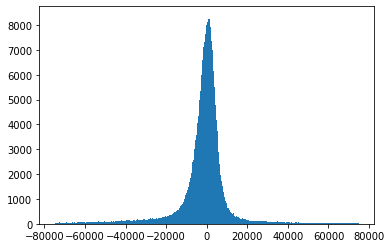

Histogram Test


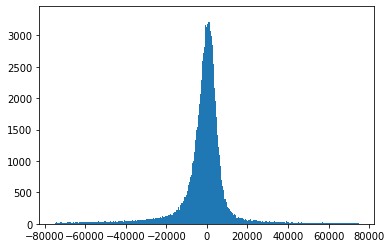

Histogram Training


/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


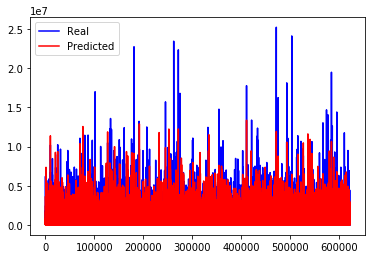

Histogram Test


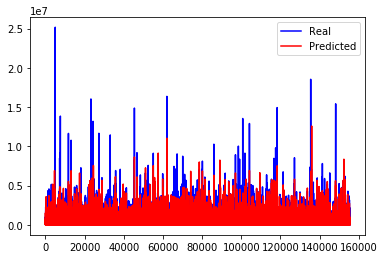

Model: 2 hidden_nodes: 114 optimizer: adagrad


KeyboardInterrupt: 

In [4]:
mse_list = []
rmse_list = []
r2_list = []
error_list = []
for index, row in df_models.iterrows():
    try:
        print('Model:', index, 'hidden_nodes:', row['hidden_nodes'], 'optimizer:', row['optimizer'])
        y_train_pred, y_test_pred, mse,rmse,r2,error = nn_functions.run_model(input_nodes, row['hidden_nodes'], x_train, x_test, y_train, y_test, row['optimizer'], epochs)
    except Exception as ex:
        print(ex)
        mse = float('nan')
        rmse = float('nan')
        r2 = float('nan')
        error = float('nan')
        print('Error while computing model: ', index)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)
    error_list.append(error)
        
df_models['mse'] = mse_list
df_models['rmse'] = rmse_list
df_models['r2'] = r2_list
df_models['error'] = error_list


In [ ]:
min_r2 = df_models['r2'].idxmax(axis=0, skipna=True)
print('Min r2:', min_r2)
print(df_models.loc[min_r2])
max_rmse = df_models['rmse'].idxmin(axis=0, skipna=True)
print('Min rmse:', max_rmse)
print(df_models.loc[max_rmse])
df_models

In [ ]:
y_train_pred, y_test_pred, mse,rmse,r2,error = nn_functions.run_model(input_nodes, 207, x_train, x_test, y_train, y_test, 'adam', epochs)
    